# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


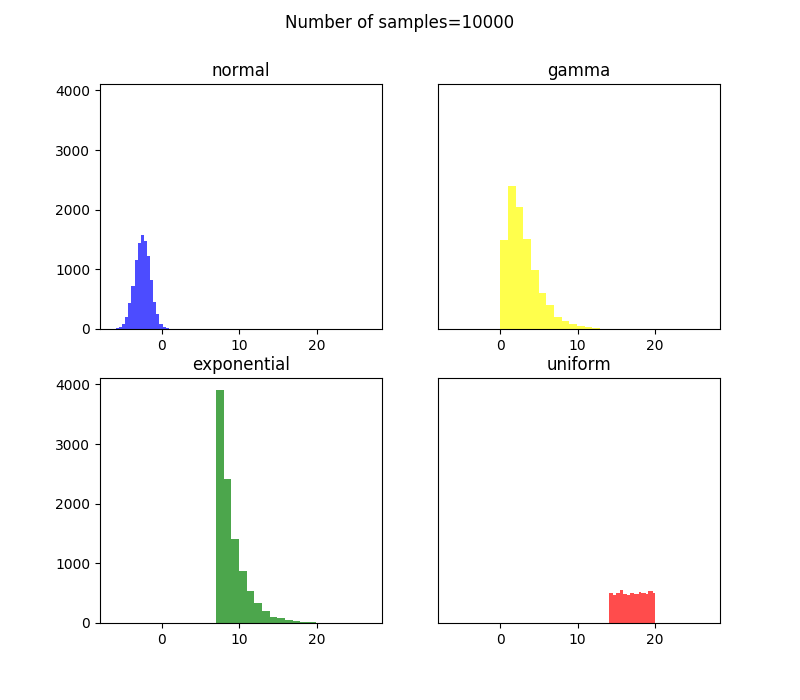

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from celluloid import Camera

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
# plt.figure(figsize=(9,3))
# plt.hist(x1, normed=True, bins=20, alpha=0.5)
# plt.hist(x2, normed=True, bins=20, alpha=0.5)
# plt.hist(x3, normed=True, bins=20, alpha=0.5)
# plt.hist(x4, normed=True, bins=20, alpha=0.5);
# plt.axis([-7,21,0,0.6])

# plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
# plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
# plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
# plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')


#Plot histograms in the same figure using subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,  figsize=(8, 7), sharex=True, sharey=True, squeeze=True)
axs = [ax1,ax2,ax3,ax4]



dists = [x1, x2,x3, x4]
dists_name = ['normal', 'gamma', 'exponential', 'uniform']
colors = ['blue', 'yellow', 'green' , 'red' ]
samples = np.arange(100, 1350, 300)

#plt.rcParams['animation.ffmpeg_path'] = '/opt/local/bin/ffmpeg'

camera = Camera(fig)
animation_count = 50
def update(curr):
    if curr == animation_count: 
        a.event_source.stop()
        camera.snap()
    bins = np.arange(-10, 10, 0.5)
    
    if curr > animation_count - 2:
        sample_size = 10000
    
    sample_size = (curr + 1) * 100
    if sample_size > 10000:
        sample_size = 10000
    
    plt.gcf().suptitle('Number of samples={}'.format(sample_size))
    
    for n in range(0,len(axs)):
        axs[n].cla()
        axs[n].hist(dists[n][:sample_size], bins=20, color=colors[n], alpha=0.7)
        axs[n].set_title(dists_name[n])
        #axs[n].box(False)
        if n %2 != 0: axs[n].yaxis.set_visible(False)
        

im_ani = animation.FuncAnimation(fig, update, interval=200)



In [64]:
!ls

animation.gif	     moocdata.png
Assignment2.ipynb    my_animation.mp4
Assignment3.ipynb    readonly
Assignment4.ipynb    test.png
data		     UnderstandingDistributionsThroughSampling.ipynb
Dejunking.ipynb      Week2.ipynb
files.tar.gz	     Week3.ipynb
iris.csv	     Week4.ipynb
Matplotlib_3D.ipynb
